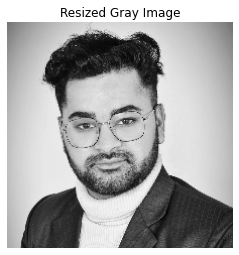

Resized gray image saved as resized_gray_image.jpg


In [14]:
import cv2
import matplotlib.pyplot as plt

# Read the original image
originalImage = cv2.imread(r'C:\Users\suraj\Desktop\edc\suraj.jpg')

# Convert the image to grayscale
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)

# Resize the grayscale image to 224x224 pixels
resizedImage = cv2.resize(grayImage, (224, 224))

# Apply a binary threshold to convert to black and white
(thresh, blackAndWhiteImage) = cv2.threshold(resizedImage, 127, 255, cv2.THRESH_BINARY)

# Display the images using matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(133)
plt.imshow(resizedImage, cmap='gray')
plt.title('Resized Gray Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Save the resized gray image
resized_gray_image_path = "resized_gray_image.jpg"
cv2.imwrite(resized_gray_image_path, resizedImage)

print("Resized gray image saved as", resized_gray_image_path)


In [28]:
import os
import cv2

# Define the input and output folder paths
input_folder = r'C:\Users\suraj\Desktop\large-dataset\rough\input'
output_folder = r'C:\Users\suraj\Desktop\large-dataset\rough\output'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through images in the input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        image_path = os.path.join(input_folder, filename)
        
        # Read the image
        original_image = cv2.imread(image_path)
        
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
        
        # Save the grayscale image to the output folder
        output_filename = os.path.splitext(filename)[0] + '_grayscale.jpg'
        output_path = os.path.join(output_folder, output_filename)
        cv2.imwrite(output_path, gray_image)
        
        print(f"Grayscale image saved: {output_filename}")
        
        

print("Image conversion to grayscale and saving completed.")


Grayscale image saved: 0001_grayscale.jpg
Grayscale image saved: 0002_grayscale.jpg
Grayscale image saved: 0003_grayscale.jpg
Grayscale image saved: 0004_grayscale.jpg
Grayscale image saved: 0005_grayscale.jpg
Grayscale image saved: 001_grayscale.jpg
Grayscale image saved: 002_grayscale.jpg
Grayscale image saved: 003_grayscale.jpg
Grayscale image saved: 004_grayscale.jpg
Grayscale image saved: 005_grayscale.jpg
Grayscale image saved: 03_grayscale.jpg
Grayscale image saved: 05_grayscale.jpg
Image conversion to grayscale and saving completed.


In [29]:
from PIL import Image
import os

def letterbox_images_in_folder(input_folder, output_folder, new_width, new_height, max_images=None):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    lst = os.listdir(input_folder)  # Input directory path
    file_number = len(lst)
    print('file number : ', file_number)

    # Iterate through images, resize using letterbox, and save
    image_count = 0

    for filename in os.listdir(input_folder):
        if max_images is not None and image_count >= max_images:
            break

        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Adjust the file extension if needed
            image_count += 1
            
            # Load the original image
            original_image = Image.open(os.path.join(input_folder, filename))

            # Calculate the scaling factors for resizing
            width_ratio = new_width / original_image.width
            height_ratio = new_height / original_image.height
            scaling_factor = min(width_ratio, height_ratio)

            # Calculate the new dimensions after resizing
            target_width = int(original_image.width * scaling_factor)
            target_height = int(original_image.height * scaling_factor)

            # Resize using the Letterbox technique
            #resized_image = original_image.resize((target_width, target_height), Image.ANTIALIAS)
            resized_image = original_image.resize((target_width, target_height), Image.Resampling.LANCZOS)
            letterboxed_image = Image.new("RGB", (new_width, new_height), (0,0,0))

            # Calculate the position to paste the resized image
            paste_x = (new_width - target_width) // 2
            paste_y = (new_height - target_height) // 2

            # Paste the resized image onto the letterboxed image
            letterboxed_image.paste(resized_image, (paste_x, paste_y))

            letterboxed_filename = os.path.splitext(filename)[0] + "_letterboxed.jpg"
            output_path = os.path.join(output_folder, letterboxed_filename)
            letterboxed_image.save(output_path)

            print('Converted : ', image_count)

    print("Letterboxing and saving complete.")

# Define your input and output paths, and other parameters
input_folder = r'C:\Users\suraj\Desktop\large-dataset\rough\output'
output_folder = r'C:\Users\suraj\Desktop\large-dataset\rough\letter_box'
new_width = 224
new_height = 224
max_images = None  # Set the maximum number of images to process, or leave it as None to process all

# Call the function to letterbox and save images
letterbox_images_in_folder(input_folder, output_folder, new_width, new_height, max_images)


file number :  12
Converted :  1
Converted :  2
Converted :  3
Converted :  4
Converted :  5
Converted :  6
Converted :  7
Converted :  8
Converted :  9
Converted :  10
Converted :  11
Converted :  12
Letterboxing and saving complete.
